In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# from statannotations.Annotator import Annotator

import json

In [2]:
cartography_majority = pd.read_csv('./results/cartography_majority.csv')
cartography_majority.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_factor,comment_id,confidence,variability,correctness,is_correct,agreement_factor_rd
0,0,what do you call a high person with downs synd...,0.051867,0.023077,0.022180,0.948133,0.023077,0.977820,1,1,1.000000,301KG0KX9CF8K5JONRZNDVHCKE12H0,0.948133,0.023077,0.977820,True,1.0
1,1,what do you call a black jew ? the one who sur...,0.017122,0.005938,0.014375,0.982878,0.005938,0.985625,0,1,1.000000,301KG0KX9CF8K5JONRZNDVHCKNQ2H7,0.017122,0.005938,0.014375,False,1.0
2,2,RT @falIngforlou: i fucking nut everytime i he...,0.952853,0.079464,0.994163,0.047147,0.079464,0.005837,0,0,1.000000,301KG0KX9CF8K5JONRZNDVHCPOAH2D,0.952853,0.079464,0.994163,True,1.0
3,3,what do you call a bunch of cripples in a hot ...,0.016010,0.012501,0.010012,0.983990,0.012501,0.989988,1,1,0.750000,301KG0KX9CF8K5JONRZNDVHCPOBH2E,0.983990,0.012501,0.989988,True,0.8
4,4,Penis Hehe wieners,0.863482,0.203993,0.990182,0.136518,0.203993,0.009818,0,0,0.666667,301KG0KX9CF8K5JONRZNDVHCPP82HY,0.863482,0.203993,0.990182,True,0.8


In [3]:
train_values_df = pd.read_csv('./results/train_values_disco.csv')
train_values_df.head()

,text_id,annotator_id,label_0,label_1,pred_label_0,pred_label_1,epoch_no
0,43133.0,23.0,0.0,1.0,0.494685,0.505315,1.0
1,33309.0,23.0,1.0,0.0,0.542935,0.457065,1.0
2,21834.0,56.0,0.0,1.0,0.569220,0.430780,1.0
3,24799.0,4.0,1.0,0.0,0.369278,0.630722,1.0
4,2236.0,1.0,1.0,0.0,0.447798,0.552202,1.0


In [4]:
len(train_values_df['text_id'].unique())

27231

In [6]:
with open('../../data/sbic_v2/sbic_v2_train.json', 'r') as file:
    data = json.load(file)

In [7]:
data['columns']

['whoTarget',
 'intentYN',
 'sexYN',
 'sexReason',
 'offensiveYN',
 'annotatorGender',
 'annotatorMinority',
 'sexPhrase',
 'speakerMinorityYN',
 'annotator_id',
 'comment_id',
 'annotatorPolitics',
 'annotatorRace',
 'annotatorAge',
 'post',
 'targetMinority',
 'targetCategory',
 'targetStereotype',
 'dataSource',
 'annotator_label',
 'label',
 'label_vector',
 'message',
 'Aindex',
 'Mindex']

In [8]:
full_df = pd.DataFrame(data['data'])
full_df.columns = data['columns']

In [9]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70535 entries, 0 to 70534
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   whoTarget          35601 non-null  float64
 1   intentYN           70535 non-null  float64
 2   sexYN              70535 non-null  float64
 3   sexReason          6002 non-null   object 
 4   offensiveYN        69045 non-null  float64
 5   annotatorGender    70534 non-null  object 
 6   annotatorMinority  18191 non-null  object 
 7   sexPhrase          6007 non-null   object 
 8   speakerMinorityYN  20241 non-null  float64
 9   annotator_id       70535 non-null  int64  
 10  comment_id         70535 non-null  object 
 11  annotatorPolitics  70534 non-null  object 
 12  annotatorRace      70534 non-null  object 
 13  annotatorAge       70534 non-null  float64
 14  post               70535 non-null  object 
 15  targetMinority     18006 non-null  object 
 16  targetCategory     180

In [10]:
train_values_df['text_id'] = train_values_df['text_id'].astype(int)
train_values_df['annotator_id'] = train_values_df['annotator_id'].astype(int)

In [11]:
train_values_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352675 entries, 0 to 352674
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   text_id       352675 non-null  int64  
 1   annotator_id  352675 non-null  int64  
 2   label_0       352675 non-null  float64
 3   label_1       352675 non-null  float64
 4   pred_label_0  352675 non-null  float64
 5   pred_label_1  352675 non-null  float64
 6   epoch_no      352675 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 18.8 MB


In [12]:
merged_df = pd.merge(train_values_df, full_df[['comment_id', 'annotator_id', 'label', 'message', 'Aindex', 'Mindex']], how='left', left_on=['annotator_id', 'text_id'], right_on=['Aindex', 'Mindex'])
merged_df.head()

,text_id,annotator_id_x,label_0,label_1,pred_label_0,pred_label_1,epoch_no,comment_id,annotator_id_y,label,message,Aindex,Mindex
0,43133,23,0.0,1.0,0.494685,0.505315,1.0,335VBRURDJU70FDLIZ6W2FSD3LQ9ET,1869048359460155317,1,White people don't shoot each other on the str...,23,43133
1,33309,23,1.0,0.0,0.542935,0.457065,1.0,3I6NF2WGIGQMJ670L4J3Q28NXEIG57,1869048359460155317,0,Describe your good features honestly\nThis is ...,23,33309
2,21834,56,0.0,1.0,0.569220,0.430780,1.0,3Y3CZJSZ9KND8WGE1FDFP6MUYNIR52,3169503690680674782,1,"Wow, not funny AND makes no sense @nhowe911 Th...",56,21834
3,24799,4,1.0,0.0,0.369278,0.630722,1.0,39O6Z4JLX2RE3MH5G51KIM2HCNPXVL,7912096326098817047,0,"Oh it's so soft, it's like a loofah!",4,24799
4,2236,1,1.0,0.0,0.447798,0.552202,1.0,3IYI9285WSUH9T6G8KRE1L6DFR9CJ9,6347880360297734464,0,There are some real life hoes on IG. Crazy.,1,2236


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352675 entries, 0 to 352674
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   text_id         352675 non-null  int64  
 1   annotator_id_x  352675 non-null  int64  
 2   label_0         352675 non-null  float64
 3   label_1         352675 non-null  float64
 4   pred_label_0    352675 non-null  float64
 5   pred_label_1    352675 non-null  float64
 6   epoch_no        352675 non-null  float64
 7   comment_id      352675 non-null  object 
 8   annotator_id_y  352675 non-null  int64  
 9   label           352675 non-null  int64  
 10  message         352675 non-null  object 
 11  Aindex          352675 non-null  int64  
 12  Mindex          352675 non-null  int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 37.7+ MB


In [14]:
def get_pred(label_0, label_1):
    if label_0 > label_1:
        return 0
    else:
        return 1

In [15]:
merged_df['pred'] = merged_df.apply(lambda row: get_pred(row.pred_label_0, row.pred_label_1), axis=1)
merged_df.head()

,text_id,annotator_id_x,label_0,label_1,pred_label_0,pred_label_1,epoch_no,comment_id,annotator_id_y,label,message,Aindex,Mindex,pred
0,43133,23,0.0,1.0,0.494685,0.505315,1.0,335VBRURDJU70FDLIZ6W2FSD3LQ9ET,1869048359460155317,1,White people don't shoot each other on the str...,23,43133,1
1,33309,23,1.0,0.0,0.542935,0.457065,1.0,3I6NF2WGIGQMJ670L4J3Q28NXEIG57,1869048359460155317,0,Describe your good features honestly\nThis is ...,23,33309,0
2,21834,56,0.0,1.0,0.569220,0.430780,1.0,3Y3CZJSZ9KND8WGE1FDFP6MUYNIR52,3169503690680674782,1,"Wow, not funny AND makes no sense @nhowe911 Th...",56,21834,0
3,24799,4,1.0,0.0,0.369278,0.630722,1.0,39O6Z4JLX2RE3MH5G51KIM2HCNPXVL,7912096326098817047,0,"Oh it's so soft, it's like a loofah!",4,24799,1
4,2236,1,1.0,0.0,0.447798,0.552202,1.0,3IYI9285WSUH9T6G8KRE1L6DFR9CJ9,6347880360297734464,0,There are some real life hoes on IG. Crazy.,1,2236,1


In [16]:
def get_confidence(label, label_0_mean, label_1_mean):
    if label == 0:
        return label_0_mean
    else:
        return label_1_mean

def get_variability(label, label_0_std, label_1_std):
    if label == 0:
        return label_0_std
    else: return label_1_std

def get_correctness(label, label_0_last, label_1_last):
    if label == 0:
        return label_0_last
    else:
        return label_1_last

def round_agree_factor(agr_factor):
    if agr_factor <= 0.6:
        return 0.6
    elif agr_factor <= 0.8:
        return 0.8
    return 1.0

In [17]:
metrics = ['mean', 'std', 'last']
def build_cartography_df(train_values_df):
    agg_df = train_values_df.sort_values(['epoch_no']).groupby(['Aindex', 'Mindex'], as_index=False).agg({'message': 'first', 'pred_label_0': metrics, 'pred_label_1': metrics, 'label': 'first', 'pred': 'last', 'annotator_id_y': 'first', 'comment_id': 'first'})
    agg_df.columns = ['Aindex', 'Mindex', 'text', 'label_0_mean', 'label_0_std', 'label_0_last', 'label_1_mean', 'label_1_std', 'label_1_last', 'label', 'pred', 'annotator_id', 'comment_id']

    agg_df['confidence'] = agg_df.apply(lambda row: get_confidence(row.label, row.label_0_mean, row.label_1_mean), axis=1)
    agg_df['variability'] = agg_df.apply(lambda row: get_variability(row.label, row.label_0_std, row.label_1_std), axis=1)
    agg_df['correctness'] = agg_df.apply(lambda row: get_correctness(row.label, row.label_0_last, row.label_1_last), axis=1)
    agg_df['is_correct'] = np.where((agg_df['label'] == agg_df['pred']), True, False)
    # agg_df['agreement_factor'] = agg_df['agreement_level'].map(convert_agreement_factor_to_num)
    # agg_df['agreement_factor_rd'] = agg_df['agreement_factor'].map(round_agree_factor)

    return agg_df

In [18]:
cartography_df = build_cartography_df(merged_df)
cartography_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,annotator_id,comment_id,confidence,variability,correctness,is_correct
0,0,27,people be shooting their guns around here late...,0.468335,0.254122,0.461694,0.531665,0.254122,0.538306,0,1,-8935932304856669427,3BAWBGQGYLTKO7BEYSXMONPT9157V8,0.468335,0.254122,0.461694,False
1,0,245,S/o to dat bitch ass nigga in Alabama who wann...,0.432531,0.089234,0.475542,0.567469,0.089234,0.524458,0,1,-8935932304856669427,306996CF6WER47Y64VPDM1493NPB19,0.432531,0.089234,0.475542,False
2,0,404,RT @NerdAtCoolTable: Any chick that gets In a ...,0.324292,0.095758,0.418641,0.675708,0.095758,0.581359,1,1,-8935932304856669427,3E24UO25QZK6UNOCE66GNHVPIXOO6O,0.675708,0.095758,0.581359,True
3,0,449,@onIinebaby I knew you were a faggot though,0.394167,0.084373,0.256264,0.605833,0.084373,0.743736,1,1,-8935932304856669427,3TZ0XG8CBUEQRE3U5WKWA5WRTTS98H,0.605833,0.084373,0.743736,True
4,0,1389,RT @iDntWearCondoms: If your girl see that ano...,0.581578,0.123331,0.710605,0.418422,0.123331,0.289395,0,0,-8935932304856669427,3X55NP42EOAPI4DVA4LX5EOVIBN3PJ,0.581578,0.123331,0.710605,True


In [19]:
len(cartography_df)

70535

In [20]:
cartography_df = pd.merge(cartography_df, cartography_majority[['comment_id', 'label', 'agreement_factor', 'agreement_factor_rd']], how='left', on=['comment_id'])
cartography_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70535 entries, 0 to 70534
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Aindex               70535 non-null  int64  
 1   Mindex               70535 non-null  int64  
 2   text                 70535 non-null  object 
 3   label_0_mean         70535 non-null  float64
 4   label_0_std          70535 non-null  float64
 5   label_0_last         70535 non-null  float64
 6   label_1_mean         70535 non-null  float64
 7   label_1_std          70535 non-null  float64
 8   label_1_last         70535 non-null  float64
 9   label_x              70535 non-null  int64  
 10  pred                 70535 non-null  int64  
 11  annotator_id         70535 non-null  int64  
 12  comment_id           70535 non-null  object 
 13  confidence           70535 non-null  float64
 14  variability          70535 non-null  float64
 15  correctness          70535 non-null 

In [21]:
cartography_df.rename(columns={'label_x': 'label', 'label_y': 'majority_label'}, inplace=True)
cartography_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,annotator_id,comment_id,confidence,variability,correctness,is_correct,majority_label,agreement_factor,agreement_factor_rd
0,0,27,people be shooting their guns around here late...,0.468335,0.254122,0.461694,0.531665,0.254122,0.538306,0,1,-8935932304856669427,3BAWBGQGYLTKO7BEYSXMONPT9157V8,0.468335,0.254122,0.461694,False,0,1.000000,1.0
1,0,245,S/o to dat bitch ass nigga in Alabama who wann...,0.432531,0.089234,0.475542,0.567469,0.089234,0.524458,0,1,-8935932304856669427,306996CF6WER47Y64VPDM1493NPB19,0.432531,0.089234,0.475542,False,1,0.666667,0.8
2,0,404,RT @NerdAtCoolTable: Any chick that gets In a ...,0.324292,0.095758,0.418641,0.675708,0.095758,0.581359,1,1,-8935932304856669427,3E24UO25QZK6UNOCE66GNHVPIXOO6O,0.675708,0.095758,0.581359,True,1,0.666667,0.8
3,0,449,@onIinebaby I knew you were a faggot though,0.394167,0.084373,0.256264,0.605833,0.084373,0.743736,1,1,-8935932304856669427,3TZ0XG8CBUEQRE3U5WKWA5WRTTS98H,0.605833,0.084373,0.743736,True,1,1.000000,1.0
4,0,1389,RT @iDntWearCondoms: If your girl see that ano...,0.581578,0.123331,0.710605,0.418422,0.123331,0.289395,0,0,-8935932304856669427,3X55NP42EOAPI4DVA4LX5EOVIBN3PJ,0.581578,0.123331,0.710605,True,0,0.666667,0.8


In [22]:
cartography_df['disagrees_with_majority'] = cartography_df.apply(lambda row: row.label != row.majority_label, axis=1)
cartography_df.tail()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,...,annotator_id,comment_id,confidence,variability,correctness,is_correct,majority_label,agreement_factor,agreement_factor_rd,disagrees_with_majority
70530,302,43898,what was the last thing diego 's mother said t...,0.366700,0.164068,0.318633,0.633300,0.164068,0.681367,1,...,-6006589323792788442,3T2HW4QDUV1S3HT7M801CRSAI2G9CP,0.633300,0.164068,0.681367,True,1,1.0,1.0,False
70531,303,43900,my weed is like the qur'an . <repeat> i burn i...,0.148932,0.111870,0.010653,0.851068,0.111871,0.989347,1,...,9066386007166689024,33KGGVH24UBYHA179RHVBYV1L8G1XA,0.851068,0.111871,0.989347,True,1,1.0,1.0,False
70532,304,43901,what 's the difference between an ariana grand...,0.035854,0.053146,0.007533,0.964146,0.053146,0.992467,1,...,-4960607763680882489,3UZUVSO3P7PM7ZWF78A171YX3D0EMM,0.964146,0.053146,0.992467,True,1,1.0,1.0,False
70533,305,43903,it 's unfortunate that roger moore could n't d...,0.962827,0.020586,0.983548,0.037173,0.020586,0.016452,0,...,-6979374753606241848,3TCFMTM8HEIXGUYAL2W2L8158ZF210,0.962827,0.020586,0.983548,True,0,0.8,0.8,False
70534,306,43908,"when i was in t - ball as a kid , i could tell...",0.403346,0.101462,0.400890,0.596654,0.101462,0.599110,1,...,-1874066282224317493,3PMR2DOWOOV67QEGQ3H2HDBK4TG54H,0.596654,0.101462,0.599110,True,1,0.8,0.8,False


In [23]:
 cartography_df['Aindex'].value_counts()


34     2382
23     1853
1      1829
14     1495
10     1451
       ... 
219       1
217       1
215       1
214       1
306       1
Name: Aindex, Length: 307, dtype: int64

1. Low confidence in majority -> see their results in multi-annotator
2. High confidence in majority -> see their results in multi-annotator
3. majority label different from multi-annotator label - boxplots
4. Annotators with low f1s

### Task 1

In [24]:
low_confidence_comment_ids = cartography_majority[cartography_majority['confidence'] <= 0.5]['comment_id'].values
len(low_confidence_comment_ids)

1585

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6')])

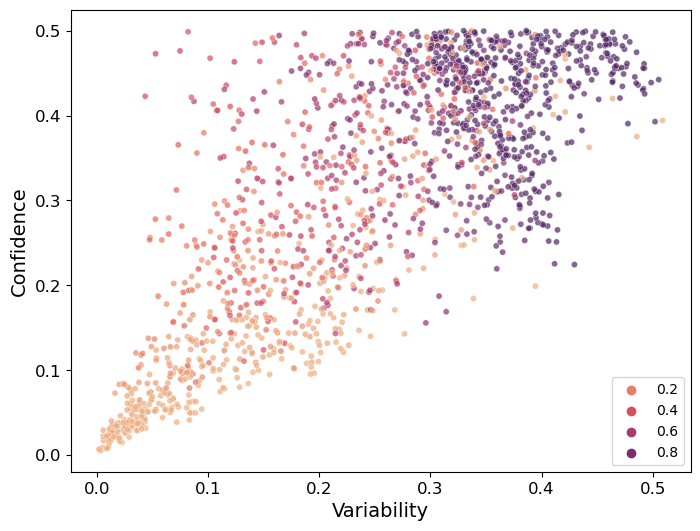

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_majority[cartography_majority['comment_id'].isin(low_confidence_comment_ids)], x="variability", y="confidence", hue='correctness', palette='flare', alpha=0.7, s=20)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [26]:
cartography_df_low_conf_in_majority = cartography_df[cartography_df['comment_id'].isin(low_confidence_comment_ids)]
cartography_df_low_conf_in_majority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3914 entries, 6 to 70531
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   3914 non-null   int64  
 1   Mindex                   3914 non-null   int64  
 2   text                     3914 non-null   object 
 3   label_0_mean             3914 non-null   float64
 4   label_0_std              3914 non-null   float64
 5   label_0_last             3914 non-null   float64
 6   label_1_mean             3914 non-null   float64
 7   label_1_std              3914 non-null   float64
 8   label_1_last             3914 non-null   float64
 9   label                    3914 non-null   int64  
 10  pred                     3914 non-null   int64  
 11  annotator_id             3914 non-null   int64  
 12  comment_id               3914 non-null   object 
 13  confidence               3914 non-null   float64
 14  variability            

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

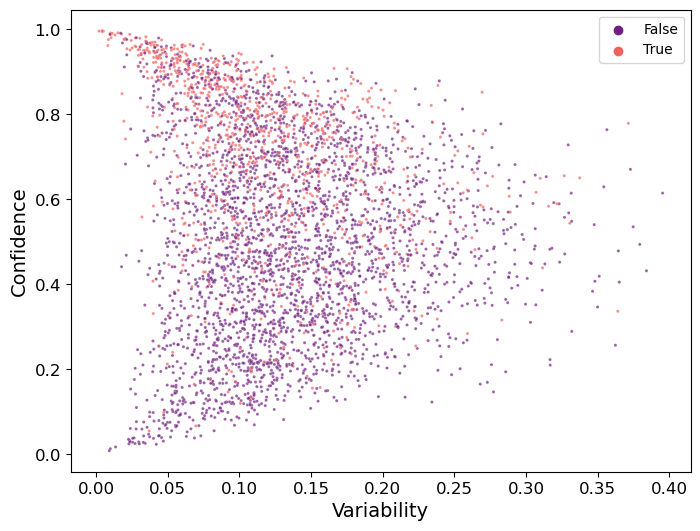

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df_low_conf_in_majority, x="variability", y="confidence", hue='disagrees_with_majority', palette='magma', alpha=0.7, s=5)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

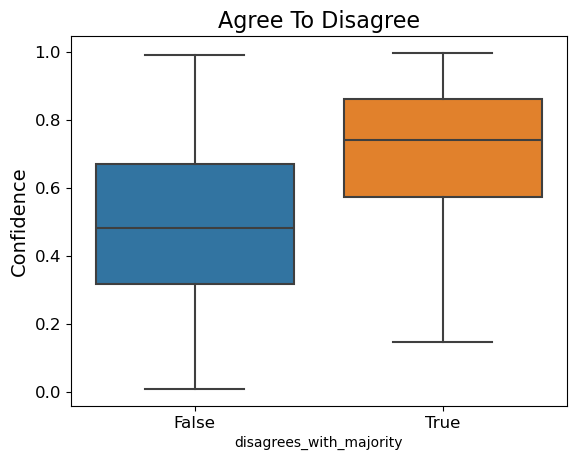

In [28]:
ax = sns.boxplot(data=cartography_df_low_conf_in_majority, x="disagrees_with_majority", y="confidence", showfliers=False)

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

so basically, text samples with low confidence in majority model shows a tred in disco that where the label by annotator disagrees with majority, there's a general trend of higher confidence compared to the labels where the annotator agrees with majority.
Need to look at samples to see if these could be mislabelled samples where the minority annotation is the correct one.

<Axes: xlabel='disagrees_with_majority', ylabel='Count'>

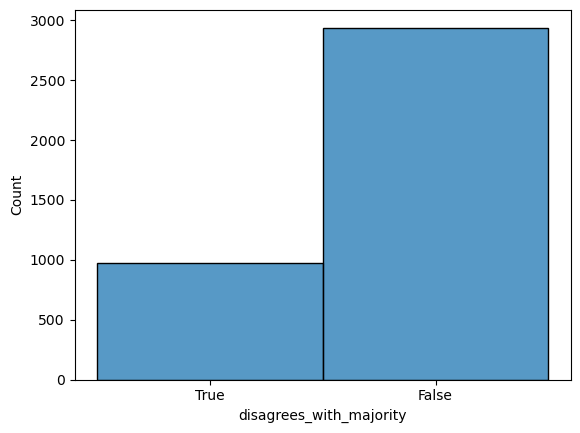

In [29]:
sns.histplot(cartography_df_low_conf_in_majority, x=cartography_df_low_conf_in_majority['disagrees_with_majority'].astype(str))

### Task 2

In [30]:
high_confidence_comment_ids = cartography_majority[cartography_majority['confidence'] > 0.5]['comment_id'].values
cartography_df_high_conf_in_majority = cartography_df[cartography_df['comment_id'].isin(high_confidence_comment_ids)]
cartography_df_high_conf_in_majority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66621 entries, 0 to 70534
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   66621 non-null  int64  
 1   Mindex                   66621 non-null  int64  
 2   text                     66621 non-null  object 
 3   label_0_mean             66621 non-null  float64
 4   label_0_std              66621 non-null  float64
 5   label_0_last             66621 non-null  float64
 6   label_1_mean             66621 non-null  float64
 7   label_1_std              66621 non-null  float64
 8   label_1_last             66621 non-null  float64
 9   label                    66621 non-null  int64  
 10  pred                     66621 non-null  int64  
 11  annotator_id             66621 non-null  int64  
 12  comment_id               66621 non-null  object 
 13  confidence               66621 non-null  float64
 14  variability           

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

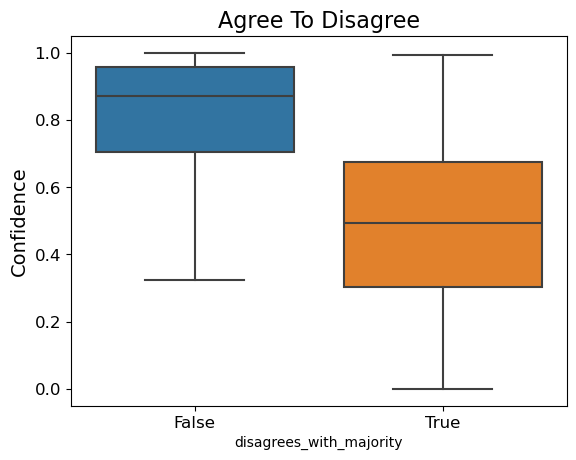

In [31]:
ax = sns.boxplot(data=cartography_df_high_conf_in_majority, x="disagrees_with_majority", y="confidence", showfliers=False)

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

### Task 3

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

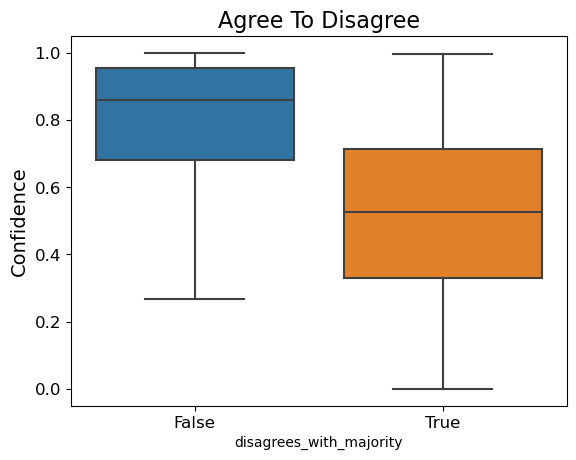

In [32]:
ax = sns.boxplot(data=cartography_df, x="disagrees_with_majority", y="confidence", showfliers=False)

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig("./plots/agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000'),
  Text(0, 70000.0, '70000')])

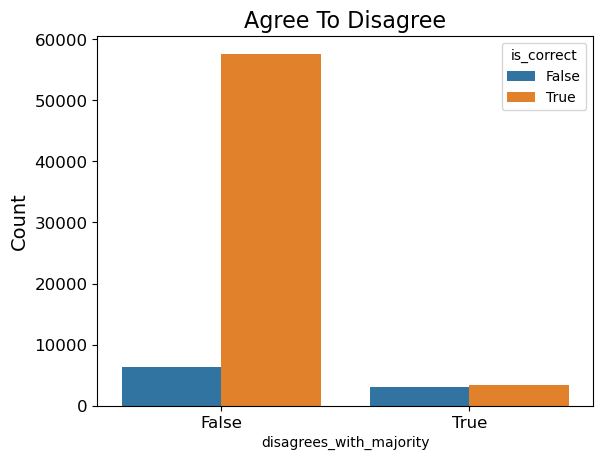

In [33]:
ax = sns.countplot(data=cartography_df, x="disagrees_with_majority", hue=cartography_df["is_correct"].astype(str))

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

### Task 4

In [34]:
num_unique_annotators = cartography_df['Aindex'].nunique()
print(num_unique_annotators)

307


In [38]:
f1_weighted = cartography_df.groupby('Aindex').apply(lambda x: f1_score(x['label'], x['pred'], average='weighted'))
f1_macro = cartography_df.groupby('Aindex').apply(lambda x: f1_score(x['label'], x['pred'], average='macro'))
group_counts = cartography_df['Aindex'].value_counts()
annotator_metrics_df = pd.DataFrame({'f1_weighted': f1_weighted, 'f1_macro': f1_macro, 'group_count': group_counts})
annotator_metrics_df.head()

,f1_weighted,f1_macro,group_count
0,0.814242,0.808488,248
1,0.842511,0.842507,1829
2,0.860692,0.848959,764
3,0.837254,0.661658,305
4,0.869109,0.862252,1144


In [39]:
annotator_metrics_df

,f1_weighted,f1_macro,group_count
0,0.814242,0.808488,248
1,0.842511,0.842507,1829
2,0.860692,0.848959,764
3,0.837254,0.661658,305
4,0.869109,0.862252,1144
...,...,...,...
302,1.000000,1.000000,1
303,1.000000,1.000000,1
304,1.000000,1.000000,1
305,1.000000,1.000000,1


In [40]:
annotator_metrics_df.sort_values(['group_count'], ascending=False)

,f1_weighted,f1_macro,group_count
34,0.822333,0.820519,2382
23,0.873055,0.866637,1853
1,0.842511,0.842507,1829
14,0.883741,0.880507,1495
10,0.887041,0.866476,1451
...,...,...,...
219,1.000000,1.000000,1
217,0.000000,0.000000,1
215,1.000000,1.000000,1
214,1.000000,1.000000,1


In [41]:
len(annotator_metrics_df[annotator_metrics_df['group_count'] < 50])

197

In [42]:
annotator_metrics_df['group_count'].sum()

70535

In [43]:
annotator_metrics_df[annotator_metrics_df['group_count'] > 50]['group_count'].sum()

69229

## Repeating the tasks for data with annotators having more than 50 annotations.

In [44]:
annotator_indices = annotator_metrics_df[annotator_metrics_df['group_count'] > 50]['group_count'].index.values
len(annotator_indices)

110

In [45]:
annotator_indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 104, 105,
       106, 107, 108, 110, 114, 179])

In [46]:
cartography_df_greater_than_50_anots = cartography_df[cartography_df['Aindex'].isin(annotator_indices)]
cartography_df_greater_than_50_anots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69229 entries, 0 to 70116
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   69229 non-null  int64  
 1   Mindex                   69229 non-null  int64  
 2   text                     69229 non-null  object 
 3   label_0_mean             69229 non-null  float64
 4   label_0_std              69229 non-null  float64
 5   label_0_last             69229 non-null  float64
 6   label_1_mean             69229 non-null  float64
 7   label_1_std              69229 non-null  float64
 8   label_1_last             69229 non-null  float64
 9   label                    69229 non-null  int64  
 10  pred                     69229 non-null  int64  
 11  annotator_id             69229 non-null  int64  
 12  comment_id               69229 non-null  object 
 13  confidence               69229 non-null  float64
 14  variability           

### Task 1

In [47]:
cartography_df_low_conf_in_majority = cartography_df_greater_than_50_anots[cartography_df_greater_than_50_anots['comment_id'].isin(low_confidence_comment_ids)]
cartography_df_low_conf_in_majority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3801 entries, 6 to 70112
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   3801 non-null   int64  
 1   Mindex                   3801 non-null   int64  
 2   text                     3801 non-null   object 
 3   label_0_mean             3801 non-null   float64
 4   label_0_std              3801 non-null   float64
 5   label_0_last             3801 non-null   float64
 6   label_1_mean             3801 non-null   float64
 7   label_1_std              3801 non-null   float64
 8   label_1_last             3801 non-null   float64
 9   label                    3801 non-null   int64  
 10  pred                     3801 non-null   int64  
 11  annotator_id             3801 non-null   int64  
 12  comment_id               3801 non-null   object 
 13  confidence               3801 non-null   float64
 14  variability            

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

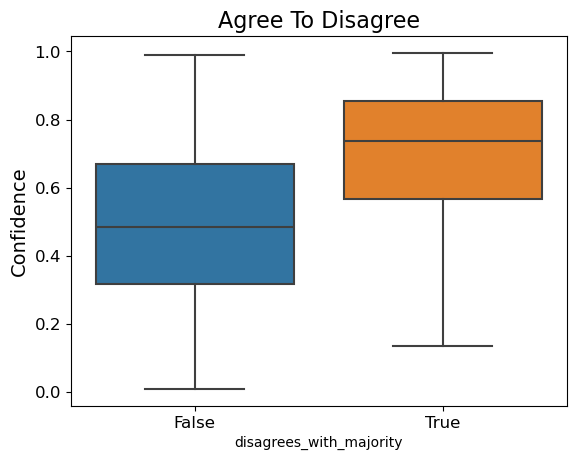

In [48]:
ax = sns.boxplot(data=cartography_df_low_conf_in_majority, x="disagrees_with_majority", y="confidence", showfliers=False)

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [49]:
cartography_df_high_conf_in_majority = cartography_df_greater_than_50_anots[cartography_df_greater_than_50_anots['comment_id'].isin(high_confidence_comment_ids)]
cartography_df_high_conf_in_majority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65428 entries, 0 to 70116
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   65428 non-null  int64  
 1   Mindex                   65428 non-null  int64  
 2   text                     65428 non-null  object 
 3   label_0_mean             65428 non-null  float64
 4   label_0_std              65428 non-null  float64
 5   label_0_last             65428 non-null  float64
 6   label_1_mean             65428 non-null  float64
 7   label_1_std              65428 non-null  float64
 8   label_1_last             65428 non-null  float64
 9   label                    65428 non-null  int64  
 10  pred                     65428 non-null  int64  
 11  annotator_id             65428 non-null  int64  
 12  comment_id               65428 non-null  object 
 13  confidence               65428 non-null  float64
 14  variability           

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

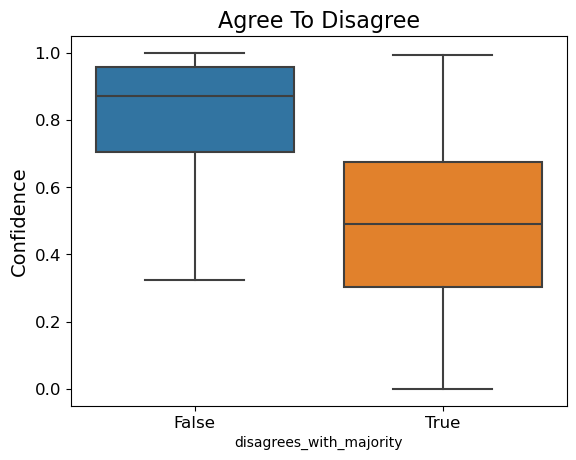

In [50]:
ax = sns.boxplot(data=cartography_df_high_conf_in_majority, x="disagrees_with_majority", y="confidence", showfliers=False)

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)